<a href="https://colab.research.google.com/github/VitoCher/ML_Labs/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_%D0%B1%D1%80%D0%B5%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [57]:
! pip install pandas scikit-learn seaborn scipy

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    df = pd.read_csv('heart.csv')

df['AGE_50'] = df['AGE_50'].astype('category')
df['MD_50'] = df['MD_50'].astype('category')
df['SES'] = df['SES'].astype('category')
df['CL_STATUS'] = df['CL_STATUS'].astype('category')
df['MD_62'] = df['MD_62'].astype('category')
df['IHD_DX'] = df['IHD_DX'].astype('category')
df['DEATH'] = df['DEATH'].astype('category')

y = df['WT_50'] # выбираем целевую переменную (количественная)
X = df.drop(['WT_50','WT_62'], axis=1) # переменные для проверки влияния

In [59]:
X

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0


Преобразование категориальных переменных остается без изменений

In [60]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [61]:
X

,SBP_50,DBP_50,HT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,AGE_50_22,AGE_50_23,AGE_50_24,...,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1
0,110,65,64,291,120,78,271,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,130,72,69,278,122,68,250,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,120,90,70,342,132,90,304,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,120,80,72,239,118,68,209,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,118,74,66,243,118,56,261,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,115,80,66,300,115,65,273,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,110,70,69,120,112,76,198,False,True,False,...,False,False,False,False,False,False,False,False,False,False
197,130,80,66,210,130,85,274,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,140,84,66,130,148,88,160,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,SBP_50,DBP_50,HT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,AGE_50_22,AGE_50_23,AGE_50_24,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1,y
0,110,65,64,291,120,78,271,False,False,False,...,True,False,False,False,False,False,False,False,True,147
1,130,72,69,278,122,68,250,False,False,False,...,False,False,False,False,False,False,False,True,True,167
2,120,90,70,342,132,90,304,False,False,False,...,True,False,False,False,False,False,False,False,True,222
3,120,80,72,239,118,68,209,False,False,False,...,False,True,False,False,False,False,False,False,True,229
4,118,74,66,243,118,56,261,False,False,False,...,True,False,False,False,False,False,False,False,True,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,115,80,66,300,115,65,273,False,False,False,...,False,False,False,False,False,False,False,False,False,148
196,110,70,69,120,112,76,198,False,True,False,...,False,False,False,False,False,False,False,False,False,137
197,130,80,66,210,130,85,274,False,False,False,...,False,False,False,False,False,False,False,False,False,150
198,140,84,66,130,148,88,160,False,False,False,...,False,False,False,False,False,False,False,False,False,138


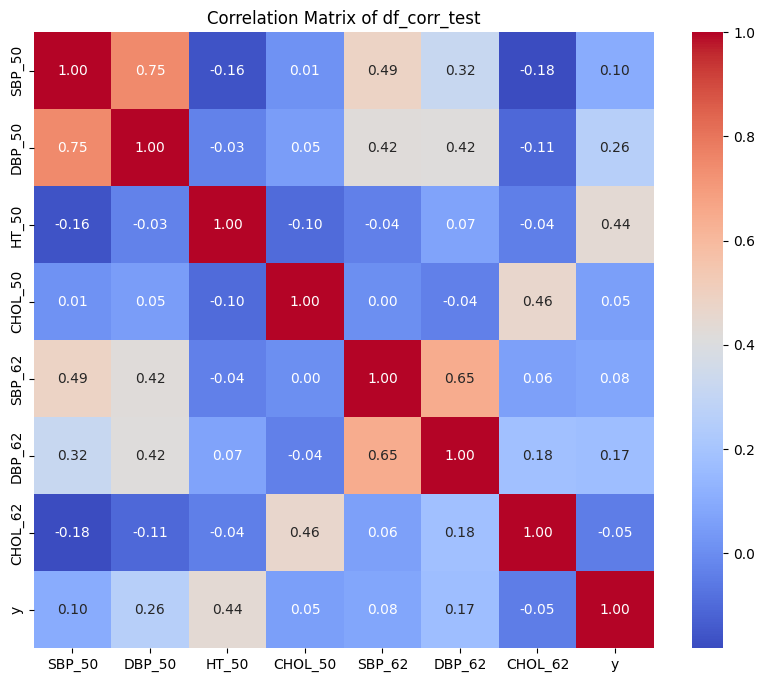

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)


correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()




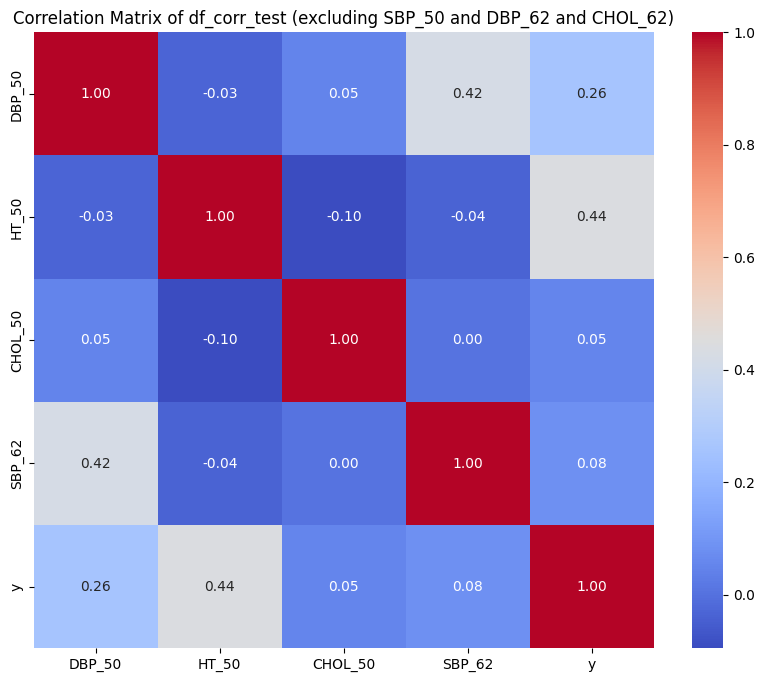

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Удаляем ненужные столбцы
df_corr_test_filtered = df_corr_test.drop(columns=['SBP_50', 'DBP_62', 'CHOL_62'], errors='ignore')

# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test_filtered.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test (excluding SBP_50 and DBP_62 and CHOL_62)")
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [66]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 24.00
Mean Squared Error (MSE): 898.80
R^2 Score: -0.16


In [67]:
resolve_regression(X[['HT_50', 'DBP_50']], y)
None


Regularization: None
Mean Absolute Error (MAE): 18.53
Mean Squared Error (MSE): 518.51
R^2 Score: 0.33


Mean Absolute Error (MAE) — средняя абсолютная ошибка. Рассчитывается как среднее значение абсолютной разницы между прогнозами и фактическими наблюдениями.

Mean Squared Error (MSE) — средняя квадратичная ошибка. Рассчитывается как среднее значение квадратов разностей между прогнозируемыми и фактически наблюдаемыми значениями.


1. Mean Absolute Error (MAE):

  Для полной модели MAE составляет 19.95, а для модели с двумя признаками — 18.53. Это означает, что вторая модель в среднем делает более точные предсказания, чем первая.

2. Mean Squared Error (MSE):

   Для полной модели MSE равен 616.70, а для модели с двумя признаками — 518.51. Меньшее значение MSE для второй модели также указывает на то, что она более точно предсказывает значения.

    R² (коэффициент детерминации) показывает долю вариации целевой переменной, объясненную моделью. Значение R² варьируется от 0 до 1, где 1 означает идеальное объяснение вариации. Для полной модели R² составляет 0.21, а для модели с одним признаком — 0.33. Это говорит о том, что модель с двумя признаками объясняет большую часть вариации в целевой переменной по сравнению с полной моделью, но они обе делают это просто ужасно.

Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [68]:
X

,SBP_50,DBP_50,HT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,AGE_50_22,AGE_50_23,AGE_50_24,...,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1
0,110,65,64,291,120,78,271,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,130,72,69,278,122,68,250,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,120,90,70,342,132,90,304,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,120,80,72,239,118,68,209,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,118,74,66,243,118,56,261,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,115,80,66,300,115,65,273,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,110,70,69,120,112,76,198,False,True,False,...,False,False,False,False,False,False,False,False,False,False
197,130,80,66,210,130,85,274,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,140,84,66,130,148,88,160,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 78 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SBP_50       200 non-null    int64
 1   DBP_50       200 non-null    int64
 2   HT_50        200 non-null    int64
 3   CHOL_50      200 non-null    int64
 4   SBP_62       200 non-null    int64
 5   DBP_62       200 non-null    int64
 6   CHOL_62      200 non-null    int64
 7   AGE_50_22    200 non-null    bool 
 8   AGE_50_23    200 non-null    bool 
 9   AGE_50_24    200 non-null    bool 
 10  AGE_50_25    200 non-null    bool 
 11  AGE_50_26    200 non-null    bool 
 12  AGE_50_28    200 non-null    bool 
 13  AGE_50_29    200 non-null    bool 
 14  AGE_50_30    200 non-null    bool 
 15  AGE_50_32    200 non-null    bool 
 16  AGE_50_33    200 non-null    bool 
 17  AGE_50_34    200 non-null    bool 
 18  AGE_50_35    200 non-null    bool 
 19  AGE_50_36    200 non-null    bool 
 20  AGE_50_37 

Отбор признаков по корреляции

In [70]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [72]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [73]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 19.93
Mean Squared Error (MSE): 576.67
R^2 Score: 0.26


In [74]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 26.23
Mean Squared Error (MSE): 921.18
R^2 Score: -0.19


Regularization: None
Mean Absolute Error (MAE): 26.23
Mean Squared Error (MSE): 921.18
R^2 Score: -0.19


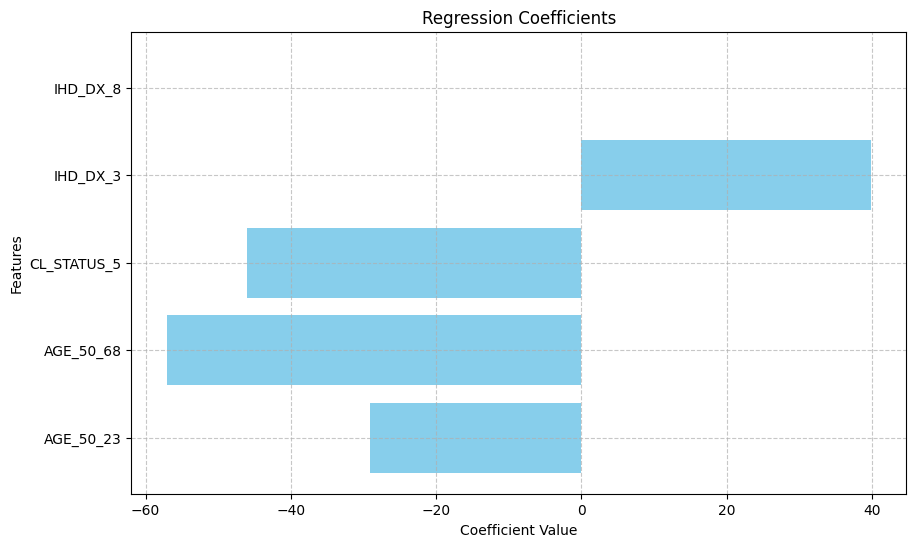

In [76]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): он показывает, насколько в среднем предсказанные значения отличаются от фактических. Значение 26.23 указывает на то, что в среднем модель ошибается на 26.23 единицы.
- **MSE** (Среднеквадратичная ошибка):Значение 921.18 указывает на то, что модель имеет значительные ошибки в предсказаниях.
- **R²** (Коэффициент детерминации): значение в -0.19 указывает на то, что модель хуже, чем простое среднее значение целевой переменной. Это сигнализирует о том, что модель неэффективна и, возможно, требует пересмотра или улучшения.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.25 означает, что модель объясняет 25% вариации данных. Это значит, что 25% разброса в значениях целевой переменной модель смогла предсказать, а 75% остаются необъясненными (шум или неизвестные факторы).

In [90]:
# # Выбираем числовые признаки
# numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()
# # ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# # Инициализируем scaler
# scaler = MinMaxScaler()

# # Применяем нормализацию
# X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

from sklearn.preprocessing import MinMaxScaler

# Выбираем числовые признаки из X_selected_rfe
# Убедимся, что мы выбираем все числовые типы (int и float)
numeric_features = X_selected_rfe.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию только к числовым признакам, если они существуют
if numeric_features:  # Проверяем, есть ли числовые признаки
    X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])
else:
    print("Нет числовых признаков для нормализации.")


Нет числовых признаков для нормализации.


In [91]:
X_selected_rfe

,AGE_50_23,AGE_50_68,CL_STATUS_5,IHD_DX_3,IHD_DX_8
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,True,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


Regularization: None
Mean Absolute Error (MAE): 26.23
Mean Squared Error (MSE): 921.18
R^2 Score: -0.19


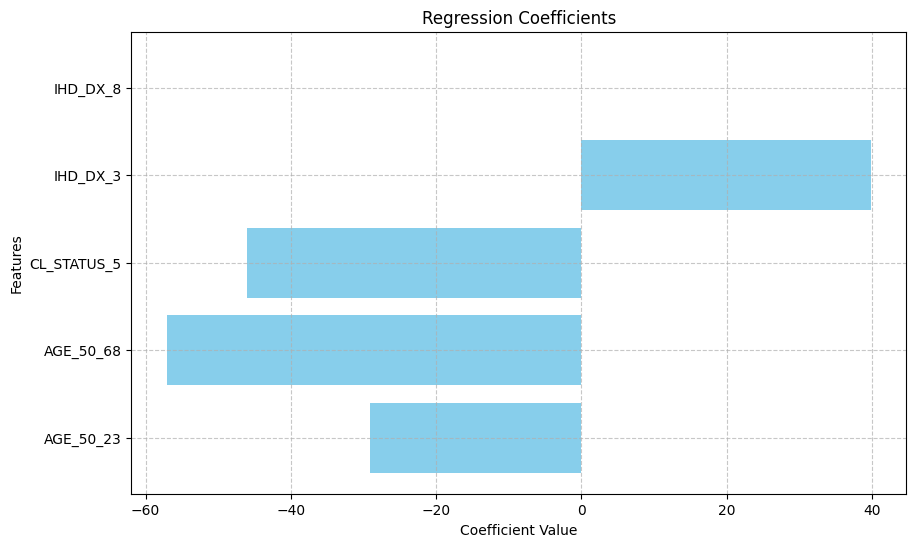

In [92]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [93]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 26.23
Mean Squared Error (MSE): 921.18
R^2 Score: -0.19


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [94]:
X

,SBP_50,DBP_50,HT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,AGE_50_22,AGE_50_23,AGE_50_24,...,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1
0,110,65,64,291,120,78,271,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,130,72,69,278,122,68,250,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,120,90,70,342,132,90,304,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,120,80,72,239,118,68,209,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,118,74,66,243,118,56,261,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,115,80,66,300,115,65,273,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,110,70,69,120,112,76,198,False,True,False,...,False,False,False,False,False,False,False,False,False,False
197,130,80,66,210,130,85,274,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,140,84,66,130,148,88,160,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 19.71
Mean Squared Error (MSE): 586.34
R^2 Score: 0.24


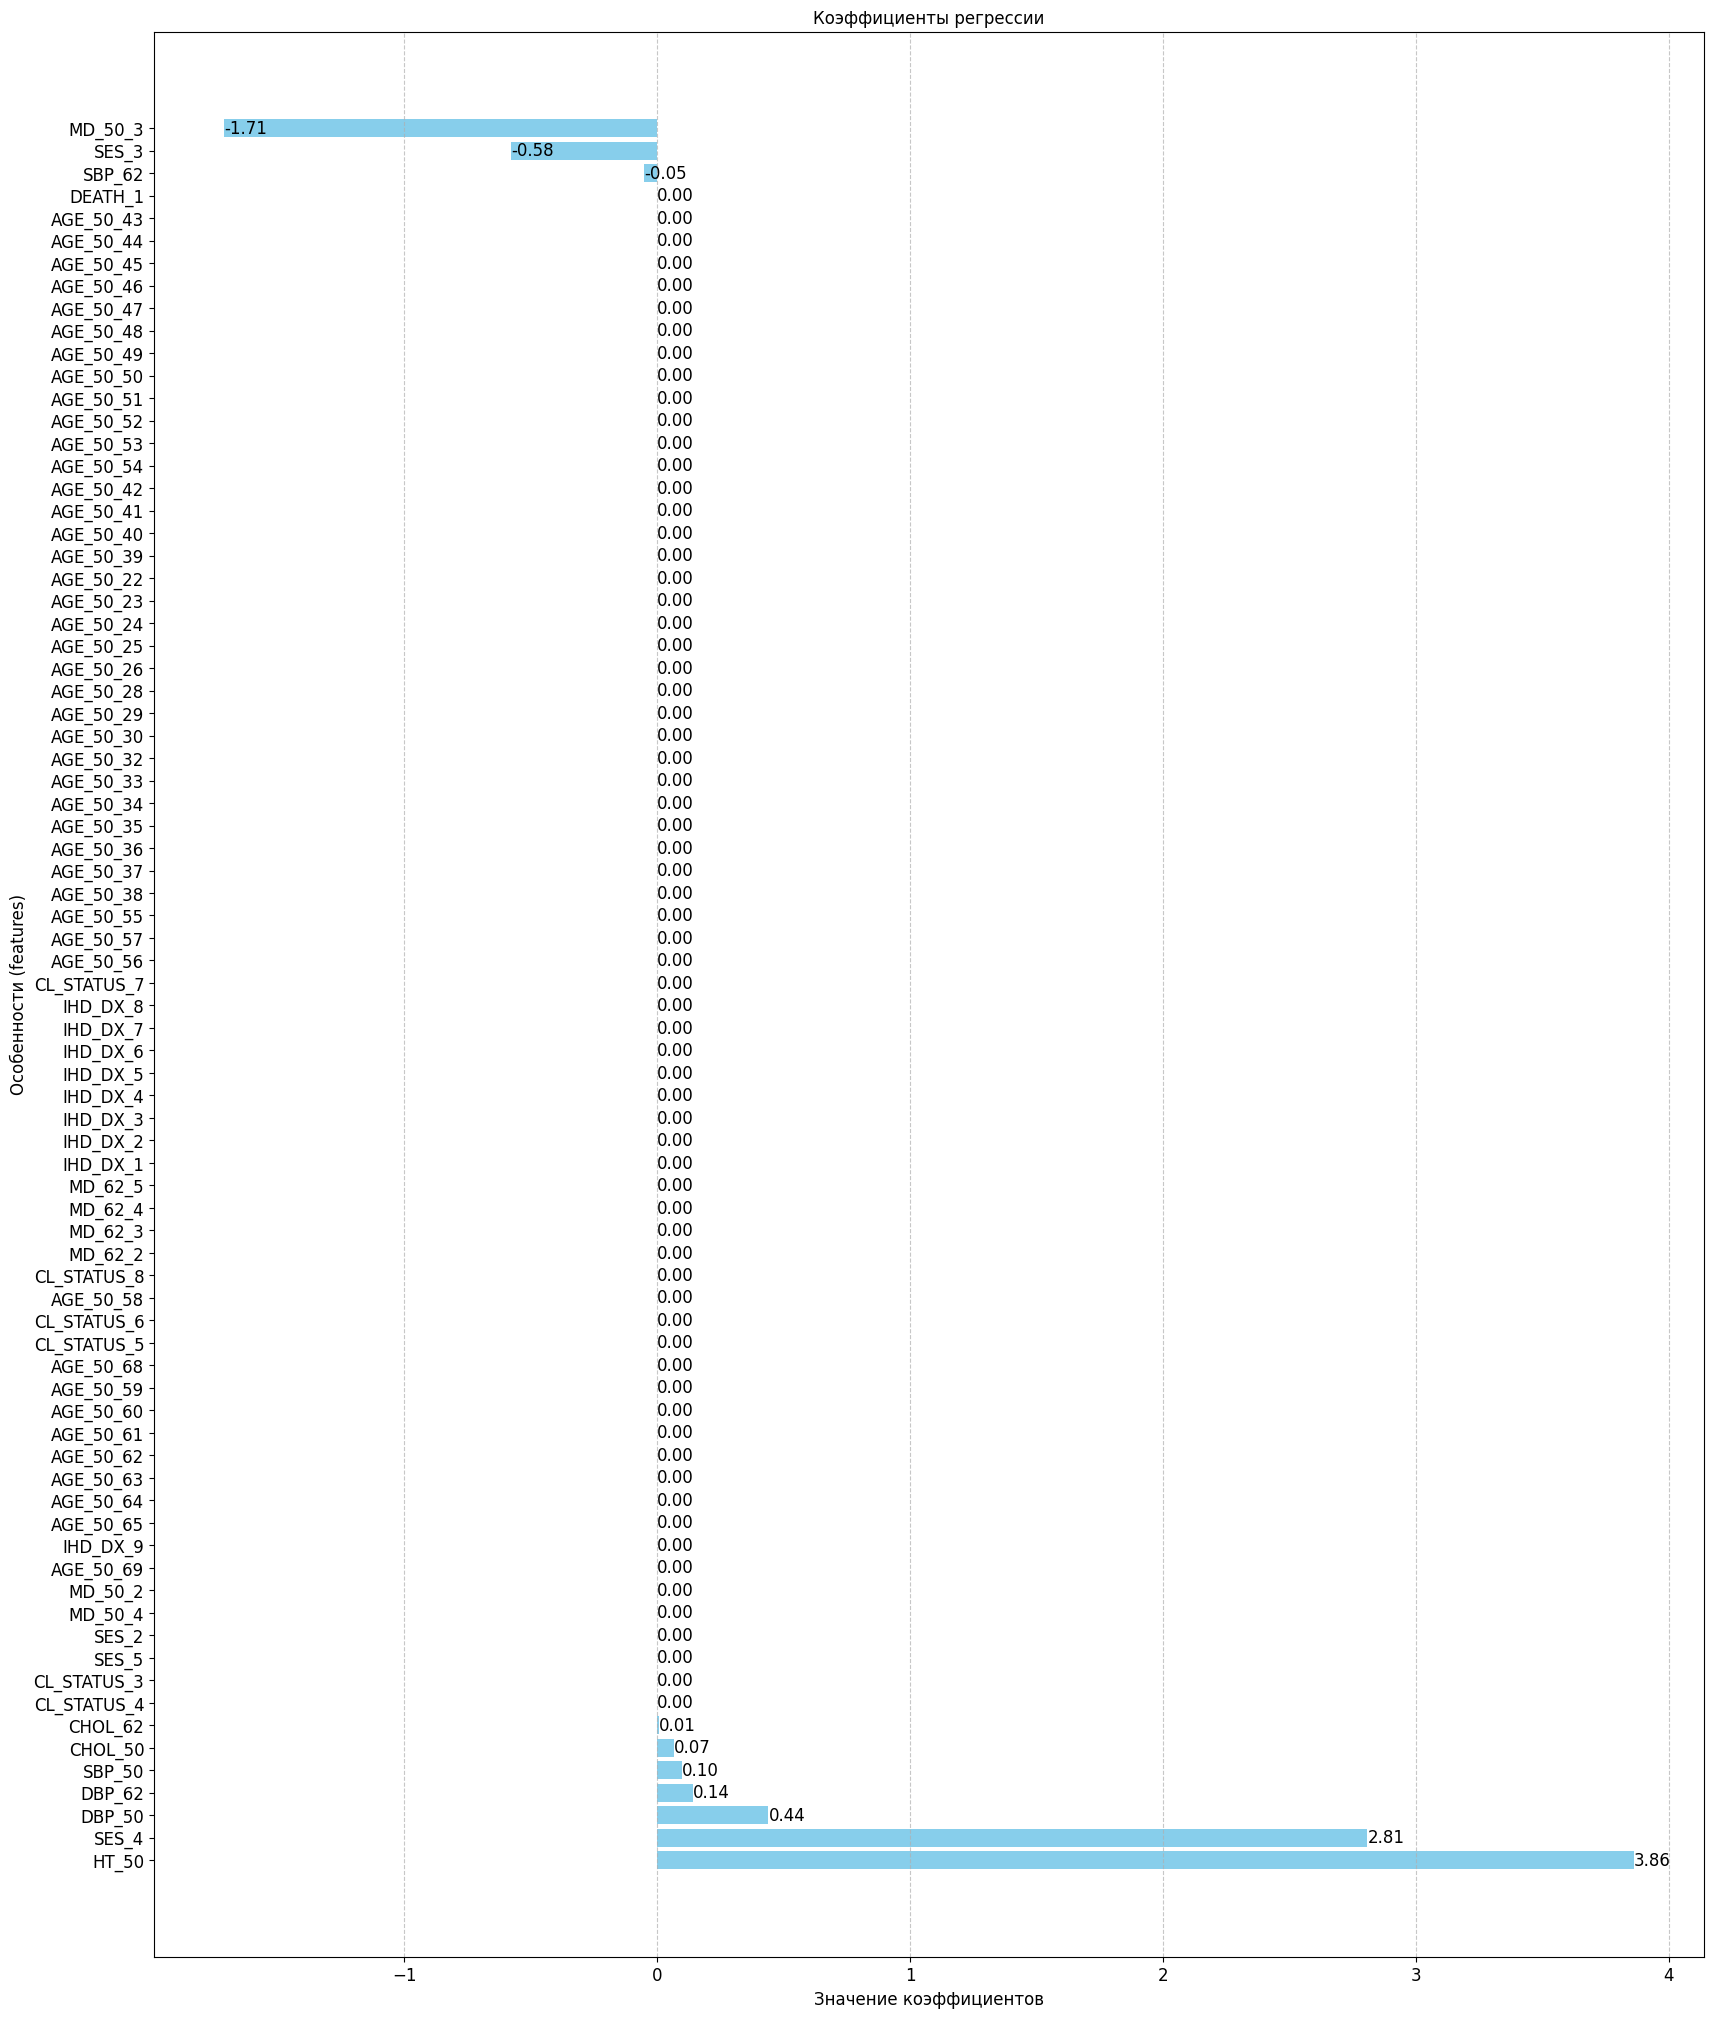

In [98]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 21.22
Mean Squared Error (MSE): 731.48
R^2 Score: 0.06


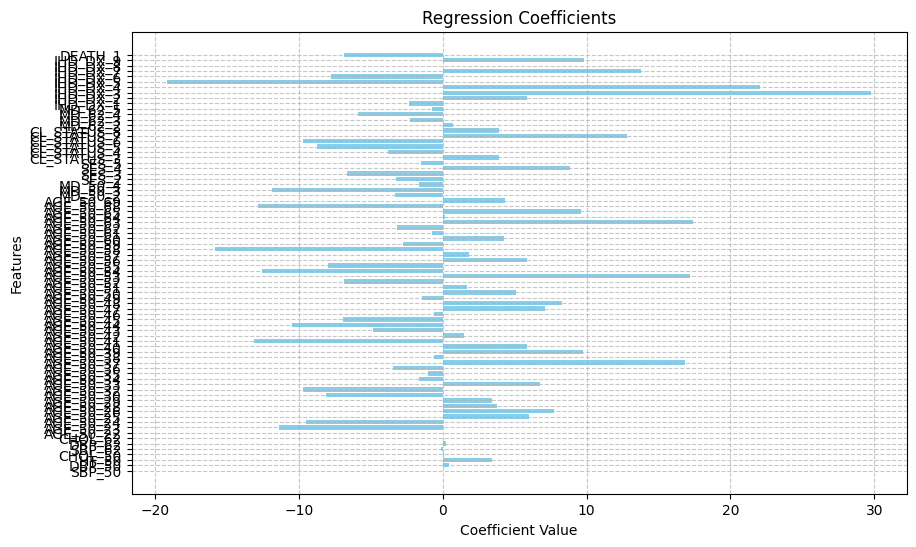

In [85]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 24.00
Mean Squared Error (MSE): 898.80
R^2 Score: -0.16


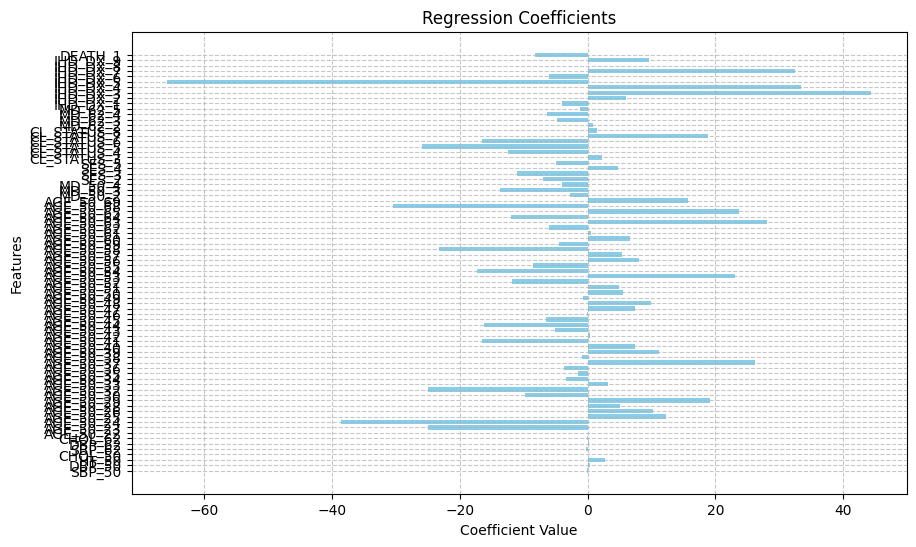

In [88]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
